In [63]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


TASK 1 NN

In [64]:
df = pd.read_csv('hcvdat0.csv')
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.fillna(df.groupby('Category').transform('mean'), inplace=True)
df['Category'] = pd.Categorical(df['Category'])
df['Sex'] = pd.Categorical(df['Sex'])

In [65]:
df

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,0=Blood Donor,32,m,38.5,52.500000,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,0=Blood Donor,32,m,38.5,70.300000,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,0=Blood Donor,32,m,46.9,74.700000,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,0=Blood Donor,32,m,43.2,52.000000,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,0=Blood Donor,32,m,39.2,74.100000,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,3=Cirrhosis,62,f,32.0,416.600000,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,3=Cirrhosis,64,f,24.0,102.800000,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,3=Cirrhosis,64,f,29.0,87.300000,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,3=Cirrhosis,46,f,33.0,93.220833,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0


In [66]:
num_df = df.select_dtypes(include=['int64', 'float64']).copy()

In [67]:
for column in df.select_dtypes(include='category').columns:
    if column=='Category':
        continue
    df = pd.concat([df, pd.get_dummies(df[column], prefix=column)],axis=1)
    df.drop([column],axis=1, inplace=True)

In [68]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Category',axis=1), df['Category'].cat.codes, test_size=0.2, random_state=42)

In [69]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)

In [70]:
for column in num_df.columns:
    scale = StandardScaler().fit(num_df[[column]])
    num_df[[column]] = scale.transform(num_df[[column]])

In [71]:
def baseline_model():
    model = Sequential()
    model.add(Dense(32, input_dim=13, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

y_train

In [72]:
model.fit(X_train,y_train,epochs=25)

Epoch 1/25
16/16 [==============================] - 0s 608us/step - loss: 0.2001 - accuracy: 0.9207
Epoch 2/25
16/16 [==============================] - 0s 582us/step - loss: 0.1978 - accuracy: 0.9289
Epoch 3/25
16/16 [==============================] - 0s 563us/step - loss: 0.1956 - accuracy: 0.9268
Epoch 4/25
16/16 [==============================] - 0s 637us/step - loss: 0.1996 - accuracy: 0.9228
Epoch 5/25
16/16 [==============================] - 0s 575us/step - loss: 0.1848 - accuracy: 0.9309
Epoch 6/25
16/16 [==============================] - 0s 577us/step - loss: 0.1771 - accuracy: 0.9289
Epoch 7/25
16/16 [==============================] - 0s 642us/step - loss: 0.1760 - accuracy: 0.9248
Epoch 8/25
16/16 [==============================] - 0s 693us/step - loss: 0.1769 - accuracy: 0.9268
Epoch 9/25
16/16 [==============================] - 0s 699us/step - loss: 0.1729 - accuracy: 0.9309
Epoch 10/25
16/16 [==============================] - 0s 563us/step - loss: 0.1783 - accuracy: 0.9309

In [73]:
y_pred = model.predict(X_test)

In [74]:
estimator = KerasClassifier(build_fn = baseline_model, epochs = 100, batch_size = 10, verbose = 0)
kfold = KFold(n_splits = 5, shuffle = True, random_state = 1001)
results = cross_val_score(estimator, X_test, y_test, cv = kfold)
print("Result: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Result: 83.03% (10.45%)


Result is quite ok but gradient boost was better (0.8827)

2 CNN

dataset used: https://www.kaggle.com/alxmamaev/flowers-recognition

In [1]:
# main libraries
import tensorflow as tf
from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam
print('version of tensorflow :',tf.__version__)

# supporting libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
import os
from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.image as mpimg

# for confusion matrix plotting
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix,confusion_matrix

version of tensorflow : 2.2.0


In [3]:
link='/home/salamander/kaggle/flowers'


In [4]:
import os
for file in os.listdir(link):
    print(link+file)

/home/salamander/kaggle/flowersflowers
/home/salamander/kaggle/flowerssunflower
/home/salamander/kaggle/flowersdandelion
/home/salamander/kaggle/flowerstulip
/home/salamander/kaggle/flowersdaisy
/home/salamander/kaggle/flowersrose


In [6]:
def create_dataframe(path,arr,label):
   for fil in os.listdir(path):
     link=path+fil
     if link[-3:]=='pyc' or link[-2:]=='py':
       continue
     img=mpimg.imread(link)
     img=resize(img,(48,48,3),anti_aliasing=True)
     img=img.reshape(6912)
     arr.append(img)
   xx=np.ones(len(arr))*label
   arr=pd.DataFrame(arr)
   xx=pd.DataFrame({'label':xx})
   arr=pd.concat([xx,arr],axis=1)
   return arr

In [8]:
daisy=[]
daisy=create_dataframe('/home/salamander/kaggle/flowers/daisy/',daisy,0)

In [9]:
type(daisy)


pandas.core.frame.DataFrame

In [10]:
daisy.head()


,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,0.0,0.615686,0.611765,0.631373,0.620221,0.614338,0.620221,0.640319,0.628554,0.627982,...,0.501430,0.549592,0.537827,0.545588,0.581618,0.573775,0.600000,0.617565,0.613440,0.645016
1,0.0,0.159150,0.151634,0.112473,0.131863,0.131699,0.090359,0.128758,0.123584,0.092157,...,0.094118,0.133333,0.137255,0.105882,0.146732,0.152778,0.117647,0.149346,0.161111,0.122821
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.0,0.058578,0.097881,0.049627,0.151716,0.215441,0.147794,0.230407,0.312311,0.238496,...,0.059023,0.290686,0.304437,0.116845,0.363480,0.367034,0.116544,0.429703,0.392034,0.114869
4,0.0,0.117647,0.247059,0.105882,0.119118,0.425000,0.101961,0.125490,0.493137,0.100490,...,0.105882,0.125490,0.137255,0.109804,0.125490,0.137255,0.109804,0.125490,0.137255,0.109804


In [12]:
sunflower=[]
sunflower=create_dataframe('/home/salamander/kaggle/flowers/sunflower/',sunflower,1)
sunflower.head()

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,1.0,0.286275,0.341176,0.984314,0.290196,0.349020,0.980392,0.298693,0.352941,0.980392,...,0.324837,0.105229,0.265359,0.452941,0.094118,0.266667,0.445098,0.106536,0.263399,0.426797
1,1.0,0.732605,0.686574,0.666013,0.773448,0.729248,0.702471,0.745343,0.680154,0.618307,...,0.184892,0.442239,0.373482,0.211765,0.364931,0.382353,0.156863,0.390686,0.352737,0.170255
2,1.0,0.292157,0.273856,0.279739,0.417647,0.382353,0.415686,0.516993,0.464706,0.524837,...,0.123529,0.121569,0.227451,0.109804,0.092157,0.182353,0.080392,0.058170,0.108497,0.050327
3,1.0,0.271569,0.343627,0.182353,0.298529,0.372059,0.212745,0.310784,0.389706,0.222549,...,0.003922,0.275980,0.315196,0.036765,0.284804,0.316176,0.021078,0.207843,0.228922,0.014216
4,1.0,0.861515,0.913690,0.983170,0.886167,0.929412,0.988235,0.901961,0.941120,0.988235,...,0.093873,0.133333,0.172549,0.070588,0.141299,0.180990,0.101486,0.112582,0.151675,0.073279


In [13]:
rose=[]
rose=create_dataframe('/home/salamander/kaggle/flowers/rose/',rose,2)
rose.head()

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,2.0,0.780433,0.109886,0.295025,0.727696,0.127180,2.482996e-01,0.823856,0.141709,0.261480,...,0.129248,0.620833,0.055474,0.123815,0.674321,0.164190,0.193765,0.790082,0.210866,0.260498
1,2.0,0.201225,0.201225,0.201225,0.225368,0.215686,2.175245e-01,0.242279,0.226593,0.230515,...,0.236765,0.190074,0.178309,0.163480,0.115074,0.105392,0.093627,0.132353,0.124510,0.127206
2,2.0,0.028105,0.090196,0.000000,0.019608,0.086275,5.572884e-17,0.027451,0.089542,0.000000,...,0.172549,0.298039,0.400654,0.156863,0.284314,0.392157,0.156863,0.273856,0.384314,0.156863
3,2.0,0.286887,0.193382,0.142402,0.275735,0.193382,1.535539e-01,0.267279,0.196691,0.145711,...,0.339216,0.338235,0.328309,0.347917,0.309559,0.325858,0.306250,0.315931,0.369608,0.330760
4,2.0,0.771569,0.699311,0.551961,0.589461,0.435907,3.651961e-01,0.655203,0.476430,0.401797,...,0.266993,0.611438,0.466340,0.430979,0.589093,0.428799,0.374387,0.552941,0.376471,0.298039


In [14]:
dandelion=[]
dandelion=create_dataframe('/home/salamander/kaggle/flowers/dandelion/',dandelion,3)
dandelion.head()

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,3.0,0.019690,0.023529,0.023529,0.024091,0.027941,0.027451,0.031373,0.035294,0.031373,...,0.086438,0.133333,0.156863,0.098039,0.133333,0.152941,0.098039,0.129412,0.152859,0.094118
1,3.0,0.206950,0.326098,0.129412,0.235401,0.346446,0.138113,0.235687,0.353799,0.131674,...,0.113725,0.146895,0.217484,0.126430,0.194838,0.261397,0.163358,0.172263,0.245307,0.151190
2,3.0,0.489869,0.552614,0.391667,0.623856,0.678758,0.513909,0.562582,0.597787,0.444846,...,0.058653,0.031373,0.027376,0.027451,0.023529,0.019608,0.023529,0.019608,0.015686,0.019608
3,3.0,0.669363,0.658211,0.614461,0.704044,0.688358,0.653676,0.715809,0.707966,0.672672,...,0.569485,0.559559,0.625613,0.589093,0.592157,0.650368,0.650368,0.633824,0.692647,0.672426
4,3.0,0.027451,0.066667,0.023529,0.015074,0.047059,0.015686,0.003922,0.027451,0.003922,...,0.073897,0.174142,0.294485,0.098162,0.263480,0.351225,0.160662,0.293260,0.383456,0.122549


In [15]:
tulip=[]
tulip=create_dataframe('/home/salamander/kaggle/flowers/tulip/',tulip,4)
tulip.head()

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
0,4.0,0.145134,0.188235,0.165936,0.219608,0.246569,0.223637,0.406602,0.424346,0.394838,...,0.190972,0.142703,0.135105,0.093627,0.093857,0.086152,0.105147,0.180239,0.151925,0.158992
1,4.0,0.730964,0.753391,0.769547,0.807230,0.812010,0.810907,0.819792,0.819792,0.816789,...,0.081250,0.164257,0.125960,0.074326,0.181066,0.128370,0.089706,0.107639,0.081904,0.056638
2,4.0,0.576981,0.544996,0.481536,0.331005,0.172181,0.384498,0.271548,0.104616,0.319036,...,0.129228,0.119812,0.037643,0.116993,0.170588,0.063603,0.200858,0.167341,0.061458,0.224142
3,4.0,0.186601,0.202696,0.128595,0.239461,0.248529,0.159559,0.237173,0.260539,0.164542,...,0.263235,0.496650,0.688971,0.491013,0.473775,0.667157,0.469853,0.422712,0.586193,0.422712
4,4.0,0.980392,0.984314,0.992157,0.980392,0.984314,0.992157,0.980392,0.982212,0.992157,...,0.820015,0.839257,0.792239,0.843219,0.827456,0.776511,0.831413,0.810633,0.768668,0.834162


In [16]:
len(daisy),len(sunflower),len(rose),len(dandelion),len(tulip)

(769, 734, 784, 1052, 984)

In [17]:
tr1=daisy.drop('label',1)
ts1=daisy['label']

X_train,X_test,y_train,y_test=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
y_train=pd.DataFrame(y_train)
y_test=pd.DataFrame(y_test)

tr1=sunflower.drop('label',1)
ts1=sunflower['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)


tr1=rose.drop('label',1)
ts1=rose['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)


tr1=dandelion.drop('label',1)
ts1=dandelion['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)


tr1=tulip.drop('label',1)
ts1=tulip['label']
x,xx,y,yy=train_test_split(tr1,ts1,test_size=0.2,random_state=0)
X_train=pd.concat([X_train,x],axis=0)
X_test=pd.concat([X_test,xx],axis=0)
y=pd.DataFrame(y)
yy=pd.DataFrame(yy)
y_train=pd.concat([y_train,y],axis=0)
y_test=pd.concat([y_test,yy],axis=0)

In [18]:
X_train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3457 entries, 481 to 684
Columns: 6912 entries, 0 to 6911
dtypes: float64(6912)
memory usage: 182.3 MB


In [19]:
flowers=['daisy','sunflower','rose','dandelion','tulip']

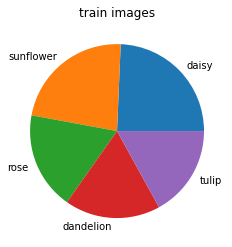

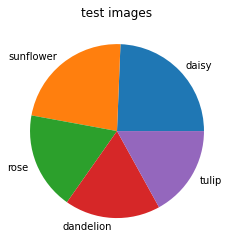

In [20]:
plt.title('train images')
plt.pie(y_train['label'].value_counts().values,labels=flowers)
plt.show()

plt.title('test images')
plt.pie(y_test['label'].value_counts().values,labels=flowers)
plt.show()

In [21]:
train=pd.concat([y_train,X_train],axis=1)
test=pd.concat([y_test,X_test],axis=1)

In [22]:
train=train.sample(frac=1)
test=test.sample(frac=1)

In [23]:
train.head()

,label,0,1,2,3,4,5,6,7,8,...,6902,6903,6904,6905,6906,6907,6908,6909,6910,6911
416,4.0,0.291503,0.306536,0.222876,0.219608,0.245098,0.141176,0.133333,0.176471,0.130065,...,0.227451,0.075163,0.332680,0.379739,0.160784,0.282353,0.439216,0.182353,0.251634,0.496732
397,1.0,0.333333,0.173204,0.129412,0.331658,0.172549,0.129202,0.333333,0.172549,0.125490,...,0.099808,0.274510,0.137255,0.101961,0.270588,0.137255,0.098039,0.266667,0.133333,0.094118
752,4.0,0.878595,0.685669,0.768954,0.898203,0.820915,0.828268,0.888160,0.809967,0.806134,...,0.191993,0.307932,0.449183,0.221330,0.270915,0.423856,0.208170,0.230065,0.363399,0.190850
435,0.0,0.211547,0.263181,0.288862,0.073203,0.167565,0.315931,0.000000,0.149673,0.360948,...,0.032843,0.149837,0.170915,0.003922,0.063235,0.097386,0.002778,0.002778,0.016667,0.000000
519,3.0,0.573162,0.624142,0.514951,0.615686,0.659436,0.537868,0.598529,0.652206,0.515564,...,0.328186,0.364706,0.419608,0.309191,0.333333,0.384314,0.274510,0.298039,0.349020,0.238603


In [24]:
X_train=train.drop('label',1)
y_train=train['label']
X_test=test.drop('label',1)
y_test=test['label']

In [25]:
X_train=X_train.to_numpy()
y_train=y_train.to_numpy()
X_test=X_test.to_numpy()
y_test=y_test.to_numpy()

In [26]:
type(y_train[0]),type(y_test[0])


(numpy.float64, numpy.float64)

In [27]:
y_train=y_train.astype('int64')
y_test=y_test.astype('int64')

In [28]:
decoder=flowers


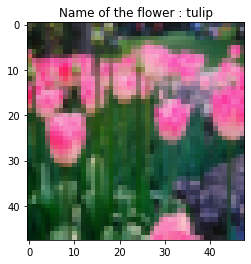

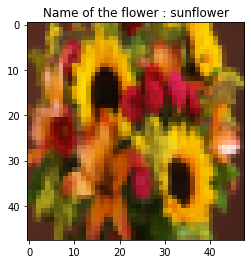

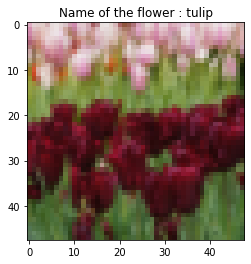

In [29]:
for i in range(3):
  #print('Type of flower :',decoder[y_train[i]])
  plt.title('Name of the flower : '+decoder[y_train[i]])
  plt.imshow(X_train[i].reshape(48,48,3))
  plt.show()

In [30]:
X_train.shape,X_test.shape


((3457, 6912), (866, 6912))

In [31]:
X_train=X_train.reshape(3457,48,48,3)
X_test=X_test.reshape(866,48,48,3)
y_train=y_train.reshape(3457,1)
y_test=y_test.reshape(866,1)

In [32]:
model=Sequential()

model.add(Conv2D(64,activation='relu',kernel_size=(3,3),input_shape=X_train[0].shape))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(5,activation='softmax'))

In [33]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 46, 64)        1792      
_________________________________________________________________
dense (Dense)                (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout (Dropout)            (None, 46, 46, 64)        0         
_________________________________________________________________
dense_1 (Dense)              (None, 46, 46, 64)        4160      
_________________________________________________________________
dropout_1 (Dropout)          (None, 46, 46, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 135424)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1

In [34]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [35]:
hist=model.fit(X_train,y_train,batch_size=10,epochs=7,verbose=1,validation_data=(X_test,y_test))

Epoch 1/7
346/346 [==============================] - 30s 87ms/step - loss: 1.3360 - accuracy: 0.4325 - val_loss: 1.1978 - val_accuracy: 0.5115
Epoch 2/7
346/346 [==============================] - 26s 76ms/step - loss: 1.1152 - accuracy: 0.5372 - val_loss: 1.1091 - val_accuracy: 0.5693
Epoch 3/7
346/346 [==============================] - 26s 75ms/step - loss: 0.9722 - accuracy: 0.6248 - val_loss: 1.1007 - val_accuracy: 0.5566
Epoch 4/7
346/346 [==============================] - 27s 78ms/step - loss: 0.7983 - accuracy: 0.6873 - val_loss: 1.0951 - val_accuracy: 0.5878
Epoch 5/7
346/346 [==============================] - 27s 78ms/step - loss: 0.6121 - accuracy: 0.7732 - val_loss: 1.1665 - val_accuracy: 0.5704
Epoch 6/7
346/346 [==============================] - 27s 77ms/step - loss: 0.4261 - accuracy: 0.8435 - val_loss: 1.3122 - val_accuracy: 0.5808
Epoch 7/7
346/346 [==============================] - 26s 76ms/step - loss: 0.2715 - accuracy: 0.9077 - val_loss: 1.5223 - val_accuracy: 0.5693

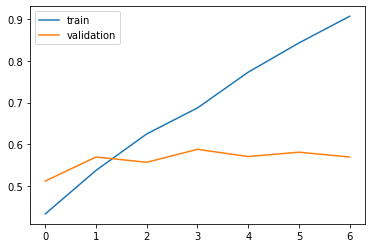

In [36]:
plt.plot(hist.history['accuracy'],label='train')
plt.plot(hist.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

In [37]:
y_pred=model.predict(X_test)


In [38]:
y_final=[]
for i in range(len(y_pred)):
  y_final.append(np.argmax(y_pred[i]))
type(y_final[0])

numpy.int64

In [41]:
y_final[:20]

[1, 2, 2, 2, 3, 2, 0, 3, 2, 0, 1, 0, 3, 4, 3, 4, 3, 3, 2, 4]

(<Figure size 648x648 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fb54576b1d0>)

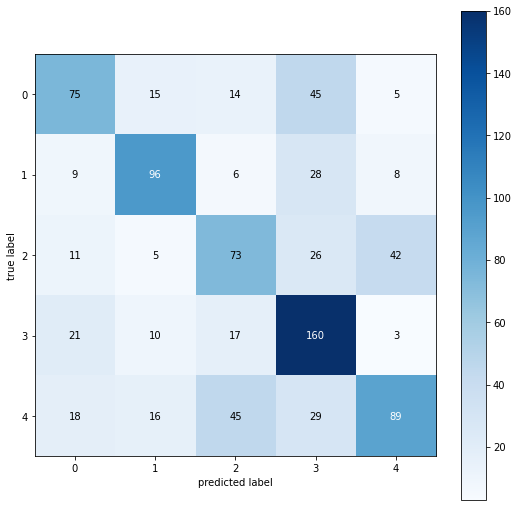

In [39]:
mat=confusion_matrix(y_test,y_final)
plot_confusion_matrix(mat,figsize=(9,9),colorbar=True)

3 RNN

In [1]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, Dropout, GlobalMaxPooling1D, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [23]:
data = pd.read_csv('SMSSpamCollection.txt', sep='\t', header=None, names=["type", 'text'])

In [24]:
data

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [25]:
data['type'].replace('ham', 0, inplace = True)
data['type'].replace('spam', 1, inplace = True)

In [26]:
data

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [27]:
text = data['text'].values
labels = data['type'].values
text_train, text_test, y_train, y_test = train_test_split(text, labels, test_size=0.2, random_state=42)
print(text_train.shape, text_test.shape)

(4457,) (1115,)


In [28]:
data.text.str.len().max()

910

In [29]:
vocab_size = 5000
maxlen = 910
embedding_size = 32

tokenizer = Tokenizer(num_words=vocab_size)
tokenizer.fit_on_texts(text_train)

X_train = tokenizer.texts_to_sequences(text_train)
x_test = tokenizer.texts_to_sequences(text_test)

X_train = pad_sequences(X_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

In [30]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_size, input_length=maxlen))
model.add(SimpleRNN(32, return_sequences=True))
model.add(GlobalMaxPooling1D())
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 910, 32)           160000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 910, 32)           2080      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 162,113
Trainable params: 162,113
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size=512, validation_data=(x_test, y_test), epochs=5)

Epoch 1/5
9/9 [==============================] - 4s 419ms/step - loss: 0.5144 - accuracy: 0.8521 - val_loss: 0.4341 - val_accuracy: 0.8664
Epoch 2/5
9/9 [==============================] - 3s 380ms/step - loss: 0.4142 - accuracy: 0.8656 - val_loss: 0.3875 - val_accuracy: 0.8664
Epoch 3/5
9/9 [==============================] - 3s 374ms/step - loss: 0.3779 - accuracy: 0.8661 - val_loss: 0.3540 - val_accuracy: 0.8664
Epoch 4/5
9/9 [==============================] - 3s 378ms/step - loss: 0.3518 - accuracy: 0.8661 - val_loss: 0.3329 - val_accuracy: 0.8664
Epoch 5/5
9/9 [==============================] - 3s 373ms/step - loss: 0.3173 - accuracy: 0.8665 - val_loss: 0.3077 - val_accuracy: 0.8664


In [35]:
prediction = model.predict(x_test)>0.5
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

accuracy: 86.64%
